In [1]:
%pip install qiskit

  Using cached pybind11-2.8.0-py2.py3-none-any.whl (207 kB)
  Attempting uninstall: pybind11
    Found existing installation: pybind11 2.3.0
    Uninstalling pybind11-2.3.0:
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'operators.h'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pylatexenc
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, BasicAer, execute
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector
import getpass

In [4]:
res = [False for i in range(0,52)]

In [5]:
    q = QuantumRegister(6)
    c = ClassicalRegister(6)
    quantum_circuit = QuantumCircuit(q, c)
    quantum_circuit.draw('mpl')

<Figure size 180.108x618.722 with 1 Axes>

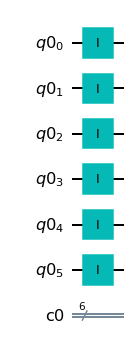

In [6]:
    for i in range(6):
        quantum_circuit.i(q[i])
    quantum_circuit.draw('mpl')

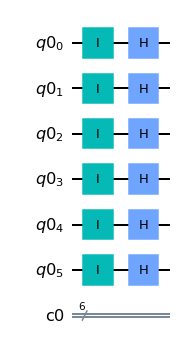

In [7]:
    # That's great and all, but I wanna play with superposition! 
    # Let's add a hadamard gate, or an H-gate!
    for i in range(6):
        quantum_circuit.h(q[i])
    # Let's look now:
    quantum_circuit.draw('mpl')
    # There it is! We've added an h-gate!

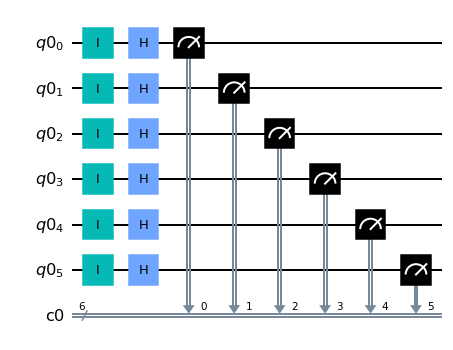

In [8]:
    # What happens if I measure my bit... how do I do that again?
    quantum_circuit.measure(0, 0)
    quantum_circuit.measure(1, 1)
    quantum_circuit.measure(2, 2)
    quantum_circuit.measure(3, 3)
    quantum_circuit.measure(4, 4)
    quantum_circuit.measure(5, 5)
    # Ooh! Did that change my circuit at all?
    quantum_circuit.draw('mpl')
    # Huh, it did! Looks like we're measuring it into a classical bit

In [9]:
    # Rerun this cell about 10 times. What do you notice about the output?
    backend = BasicAer.get_backend('qasm_simulator')
    #plot_histogram(counts)

In [10]:
    # Sometimes, my output is 1, and sometimes it's 0!
    # My code almost acts like a coin flip! I guess it has
    # something to do with measuring my qubit after putting an h-gate...
    # ...I wonder what else I could do with qiskit!

In [11]:
def drawCard():
    counts=execute(quantum_circuit, backend, shots=1).result().get_counts(quantum_circuit)
    currentDraw = counts.most_frequent()
    x = int(currentDraw, 2)
    #print(x)
    while x >= 52 or res[x]==True:
        counts=execute(quantum_circuit, backend, shots=1).result().get_counts(quantum_circuit)
        plot_histogram(counts)
        currentDraw = counts.most_frequent()
        x = int(counts.most_frequent(), 2)
    #print(x)
    res[x] = True
    return x
    

In [12]:
card = drawCard()
suit = int(card/13) #suit
value = card%13 #value

In [13]:
suitDict = {
  0: "Diamonds",
  1: "Hearts",
  2: "Spades",
  3: "Clubs"
}

In [14]:
valueDict = {
  0: "Ace",
  1: "2",
  2: "3",
  3: "4",
  4: "5",
  5: "6",
  6: "7",
  7: "8",
  8: "9",
  9: "10",
  10: "Jack",
  11: "Queen",
  12: "King"
}

In [15]:
#Testing draw card
cardValue = str(valueDict.get(value)) + " of " + str(suitDict.get(suit))
print(cardValue)
print(res)

Ace of Hearts
[False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [16]:
def getCard(num):
    suit = int(num/13) #suit
    value = num%13 #value
    #num/13 value
    #num%13 suit
    return str(valueDict.get(value) + " of " + str(suitDict.get(suit)))

In [17]:
def blackJackSetup():
    global dealerCards
    dealerCards = [drawCard(), drawCard()]
    global myCards
    myCards = [drawCard(), drawCard()]
def printDealerCards(shouldPrintFirst):
    print("Dealer Cards: ")
    count = 0
    for i in dealerCards:
        if count == 0 and shouldPrintFirst:
            print("\tFacedown Card")
            count = count + 1
        else:
            print("\t" + getCard(i))
def numToVal(element):
    result = element%13 + 1
    if result > 10:
        result = 10
    return result
def printYourCards():
    print("Your Cards: ")
    for i in myCards:
        print("\t" + getCard(i))
def promptUser():
    userInput = input("Do you wannna hit?(yes/no)")
    
    if(userInput == "yes"):
        hitPerson(myCards)
        return True
    else:
        return False
def hitPerson(hand):
    hand.append(drawCard())
def getHandValue(hand):
    sum = 0;
    aceCondition = False
    for element in hand:
        num = numToVal(element)
        if num == 1:
            num = 11;
            aceCondition = True
        sum  = sum + num
    if sum > 21 and aceCondition:
        sum = sum - 10
    return sum
def printEndGame():
    userValue = getHandValue(myCards)
    dealerValue = getHandValue(dealerCards)
    
    if(dealerValue > 21 or userValue > dealerValue):
        print("Game Over, You Win!!")
    elif(dealerValue==userValue):
        q2 = QuantumRegister(1)
        c2 = ClassicalRegister(1)
        quantum_circuit2 = QuantumCircuit(q2, c2)
        quantum_circuit2.i(q2[0])
        quantum_circuit2.h(q2[i])
        quantum_circuit2.measure(0, 0)
        counts2=execute(quantum_circuit2, backend, shots=1).result().get_counts(quantum_circuit2)
        thisVal = counts2.most_frequent()
        if (counts2 == "0"):
            print("Game Over, You Lose.")
        else:
            print("Game Over, You Win!!")
    else:
        print("Game Over, You Lose.")
    

In [18]:
#run game

#setup
gameOver = False
blackJackSetup()
handValue = 0

printDealerCards(True)
printYourCards()
    
#game loop
while True:
    print("---------------------------------------------------")
    if(handValue >= 21 or not promptUser()):
        break
    
    printDealerCards(True)
    printYourCards()
    
    handValue = getHandValue(myCards)

if handValue < 21:
    print("-----Dealer Turn------")
    while getHandValue(dealerCards) < 17:
        dealerCards.append(drawCard())

    printDealerCards(False)
    printYourCards()
    printEndGame()
else:
    print("Bust! Game Over, You Lose.")
    

QiskitError: 'Multiple values have the same maximum counts: 100101,111010,001000'